In [29]:
# setup dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
import re

In [30]:
# Upload csv file
csv = pd.read_csv("clean_data.csv", low_memory=False)

In [31]:
# display data
csv.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 4,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,Burst,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN


In [53]:
# find the different kinds of shoes we are looking for: flats, athletic shoe, boot, sandal/filp flops, heels/pumps, other

names = ["boot" if "boot" in name else "other" for name in shoe_data["name"]]

#print(names)

for index,name in shoe_data["name"].iteritems():
    #print(name)
    if bool(re.search("boot*",name.lower())):
        csv.loc[index,"Shoe Category"] = "boot"
    elif bool(re.search("flat*",name.lower())):
        csv.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("loafer*",name.lower())):
        csv.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("athletic*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sneaker*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("walk*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("run*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sandal*",name.lower())):
        csv.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("flip*",name.lower())):
        csv.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("heel*",name.lower())):
        csv.loc[index,"Shoe Category"] = "heel"
    elif bool(re.search("pump*",name.lower())):
        csv.loc[index,"Shoe Category"] = "heel"
    else:
        csv.loc[index,"Shoe Category"] = "other"

shoe_category = csv["Shoe Category"] 

csv["Shoe Category"] = shoe_category

csv.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7,Shoe Category,size
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes,boot,11.0
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat,9.0
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat,6.0
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat,6.0
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat,7.0


In [33]:
# count the types of shoes
shoe_count = csv["Shoe Category"].value_counts()

shoe_count

boot        3393
other       2028
sandal      1234
flat        1210
athletic    1118
heel        1017
Name: Shoe Category, dtype: int64

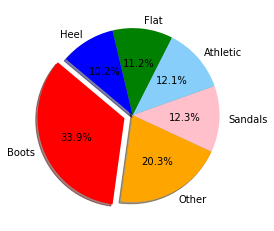

In [46]:
# create pie chart for the different kinds of shoes for women that are produced based on this dataset

# labels for the pie chart
labels = ["Boots", "Other", "Sandals", "Athletic", "Flat", "Heel"]

# the number of shoes produced for each category
sizes = shoe_count

# set colors for each shoe category for our pie chart
colors = ["red", "orange", "pink", "lightskyblue", "green", "blue"]

# seperate the "Others" section from the others
explode = (0.1, 0, 0, 0, 0, 0)

# create pie chart to display kinds of shoe values for women
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# save chart as png file
plt.savefig("Pie Chart for Shoe Categories.png")

plt.show()

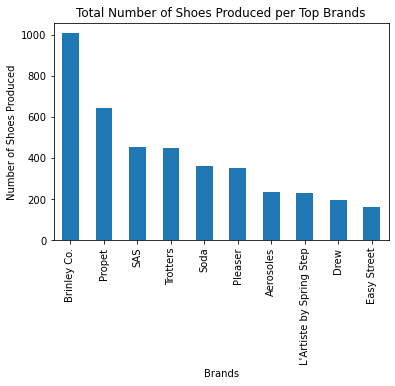

In [47]:
# list the brand that produces the highest number of shoes based on frequency
brands = csv["brand"].value_counts()

# sort by the top 10 brands that produce the most shoes
#top_brands = shoe_data.groupby("brand").shoe_counts.nlargest(10).reset_index()
top_brands = brands.head(10)

# create bar chart
top_brands.plot(kind="bar")
plt.ylabel("Number of Shoes Produced")
plt.xlabel("Brands")
plt.title("Total Number of Shoes Produced per Top Brands")

# save chart as png file
plt.savefig("Bar Chart for Top Brands.png")

plt.show()

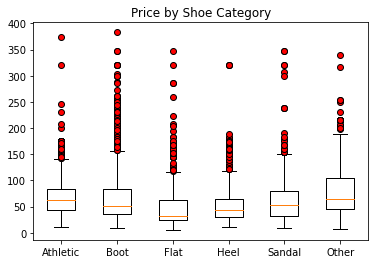

In [48]:
Price = csv

# Price.drop_duplicates(subset='id', keep='last', inplace=True)
Price = Price.loc[Price["prices.amountMin"].between(0,500)]
Athletic = Price.loc[Price["Shoe Category"]=="athletic"]
Boot = Price.loc[Price["Shoe Category"]=="boot"]
Flat = Price.loc[Price["Shoe Category"]=="flat"]
Heel = Price.loc[Price["Shoe Category"]=="heel"]
Sandal = Price.loc[Price["Shoe Category"]=="sandal"]
Other = Price.loc[Price["Shoe Category"]=="other"]
data = [Athletic["prices.amountMin"],Boot["prices.amountMin"],Flat["prices.amountMin"],Heel["prices.amountMin"],Sandal["prices.amountMin"],Other["prices.amountMin"]]
ticks = ["Athletic","Boot","Flat","Heel","Sandal","Other"]

fig1,ax1 = plt.subplots()
flierprops = dict(markerfacecolor = 'red')
ax1.boxplot(data, flierprops = flierprops)
ax1.set_title("Price by Shoe Category")
ax1.set_xticklabels(ticks)

# save plot as png file
plt.savefig("Box Plot for Price Vs. Shoe Categories.png")

plt.show()

In [49]:
# find the unique sizes for the prices.size column
csv["size"]=csv["prices.size"].str.extract("(\d*)")
csv["size"]=pd.to_numeric(csv["size"],errors='coerce')
csv["size"].unique()

array([ 11.,   9.,   6.,   7.,   8.,  10.,  12.,   5.,   4.,  nan,  38.,
        14.,  13.,  39.,  36.,  37.,  41.,  42.,  40.,  35.,  15.,  16.,
        43.,  55.,   1.,   3.,   2.,  44., 600.,  17.])

In [50]:
# create size dataframe
sizeDF = csv.loc[csv["size"].between(4,12)]
sizeDF = sizeDF.loc[sizeDF["prices.amountMin"].between(0,500)]
sizeDF["size"].unique()

array([11.,  9.,  6.,  7.,  8., 10., 12.,  5.,  4.])

The r-value is: 0.061574380653851034


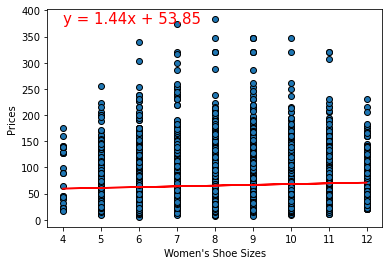

In [51]:
# create linear regression line for sizes vs prices
(slope,intercept,rvalue,pvalue,stderr)=linregress(sizeDF["size"],sizeDF["prices.amountMin"])
regress_values = sizeDF["size"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# create scatter plot
plt.scatter(sizeDF["size"],sizeDF["prices.amountMin"],edgecolors="black")
plt.plot(sizeDF["size"],regress_values,"r-")
plt.annotate(line_eq,(4,375),fontsize = 15,color="red")
plt.ylabel("Prices")
plt.xlabel("Women's Shoe Sizes")

# show regression line
print(f"The r-value is: {rvalue}")

# save plot as png file
plt.savefig("Scatter Plot for Sizes vs Price.png")

plt.show()